# Load modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy import stats
import statsmodels.formula.api as smf
import statsmodels.api as sm

# 2. Load data

In [2]:
numparental = pd.read_csv("/users/cmdb/qbb2021-answers/day4-evening/aau1043_dnm.tsv", sep = ",")
age = pd.read_csv("/users/cmdb/qbb2021-answers/day4-evening/aau1043_parental_age.tsv", sep = ",")

In [3]:
numparental

,Chr,Pos,Ref,Alt,Proband_id,Phase_combined,Crossover,Sanger
0,chr1,241097646,C,T,99379,father,paternal_crossover,confirmed
1,chr10,29202943,A,G,8147,father,maternal_crossover,PCR failed
2,chr11,129441657,C,T,5410,mother,maternal_crossover,confirmed
3,chr13,96867147,A,G,46025,father,paternal_crossover,confirmed
4,chr17,50609998,C,T,144769,mother,maternal_crossover,confirmed
...,...,...,...,...,...,...,...,...
26426,chr9,137374330,C,T,54383,father,NaN,NaN
26427,chr9,137396508,C,T,39729,father,NaN,NaN
26428,chr9,137633973,C,A,17904,mother,NaN,NaN
26429,chr9,137889777,G,A,80108,father,NaN,NaN


In [4]:
age

,Proband_id,Father_age,Mother_age
0,675,31,36
1,1097,19,19
2,1230,30,28
3,1481,32,20
4,1806,38,34
...,...,...,...
391,153657,27,23
392,154565,36,30
393,154621,19,18
394,154810,32,28


# 3. Count the number of de novo mutations per proband

# Tot_dnm

In [5]:
proband_id = numparental.loc[:, "Proband_id"]
proband_id.value_counts()

91410     122
114094    121
111288    115
8147      114
88246     113
         ... 
121087     37
62630      34
76504      34
37789      34
13990      33
Name: Proband_id, Length: 396, dtype: int64

In [6]:
df_total_proband_id = proband_id.value_counts()

# pat_dnm

In [7]:
roi = numparental.loc[:, "Phase_combined"] == 'father'
df_father = numparental.loc[roi, :]
probandf = df_father.loc[:, "Proband_id"]
df_pat_dnm = probandf.value_counts()
df_pat_dnm

91410     111
114094     98
111288     93
99984      91
64166      88
         ... 
76504      27
1097       26
13990      25
36430      25
37789      17
Name: Proband_id, Length: 396, dtype: int64

# mat_dnm

In [8]:
roi = numparental.loc[:, "Phase_combined"] == 'mother'
df_mother = numparental.loc[roi, :]
probandm = df_mother.loc[:, "Proband_id"]
df_mat_dnm = probandm.value_counts()
df_mat_dnm

112917    32
13191     31
101332    30
142988    29
14991     28
          ..
93086      4
130614     3
37789      3
113829     3
121087     1
Name: Proband_id, Length: 396, dtype: int64

# New pandas dataframe with columns: proband_id, pat_dnm, mat_dnm, tot_dnm

In [9]:
new_df = {"total_dnm": df_total_proband_id, "pat_dnm": df_pat_dnm, "mat_dnm": df_mat_dnm}
pd.DataFrame(new_df)
Denovo_counts = pd.DataFrame(new_df)
Denovo_counts['Proband_id'] = Denovo_counts.index
Denovo_counts

,total_dnm,pat_dnm,mat_dnm,Proband_id
675,70,51,19,675
1097,39,26,12,1097
1230,57,42,12,1230
1481,68,53,14,1481
1806,78,61,11,1806
...,...,...,...,...
153657,49,41,8,153657
154565,75,61,14,154565
154621,50,39,11,154621
154810,69,55,14,154810


# 4. Use pandas merge function to combine the above data frame with ages data frame

In [10]:
merge = pd.merge(age, Denovo_counts)
merge

,Proband_id,Father_age,Mother_age,total_dnm,pat_dnm,mat_dnm
0,675,31,36,70,51,19
1,1097,19,19,39,26,12
2,1230,30,28,57,42,12
3,1481,32,20,68,53,14
4,1806,38,34,78,61,11
...,...,...,...,...,...,...
391,153657,27,23,49,41,8
392,154565,36,30,75,61,14
393,154621,19,18,50,39,11
394,154810,32,28,69,55,14


# 5. Plot maternal de novo mutations vs. maternal age

In [11]:
maternal_mut = merge.loc[:,"mat_dnm"]
maternal_mut

0      19
1      12
2      12
3      14
4      11
       ..
391     8
392    14
393    11
394    14
395    16
Name: mat_dnm, Length: 396, dtype: int64

In [12]:
maternal_age = merge.loc[:,"Mother_age"]
maternal_age

0      36
1      19
2      28
3      20
4      34
       ..
391    23
392    30
393    18
394    28
395    34
Name: Mother_age, Length: 396, dtype: int64

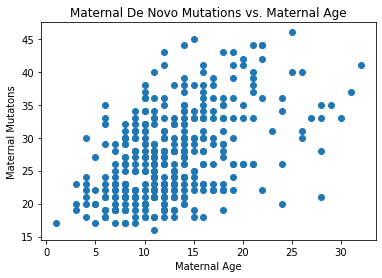

In [13]:
x = maternal_mut
y = maternal_age
fig, ax = plt.subplots()
ax.scatter(x, y)
ax.set_title("Maternal De Novo Mutations vs. Maternal Age")
ax.set_xlabel("Maternal Age")
ax.set_ylabel("Maternal Mutatons")
plt.show()

# 5. Plot paternal de novo mutations vs. paternal age

In [14]:
paternal_mut = merge.loc[:,"mat_dnm"]
paternal_mut

0      19
1      12
2      12
3      14
4      11
       ..
391     8
392    14
393    11
394    14
395    16
Name: mat_dnm, Length: 396, dtype: int64

In [15]:
paternal_age = merge.loc[:,"Mother_age"]
paternal_age

0      36
1      19
2      28
3      20
4      34
       ..
391    23
392    30
393    18
394    28
395    34
Name: Mother_age, Length: 396, dtype: int64

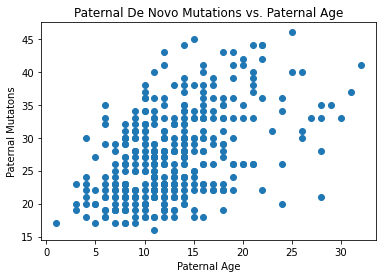

In [16]:
x2 = paternal_mut
y2 = paternal_age
fig, ax = plt.subplots()
ax.scatter(x2, y2)
ax.set_title("Paternal De Novo Mutations vs. Paternal Age")
ax.set_xlabel("Paternal Age")
ax.set_ylabel("Paternal Mutatons")
plt.show()

# 6. Use OLS to test for an association between maternal age and maternal de novo mutations

In [17]:
model = smf.ols(formula = "mat_dnm ~ 1 + Mother_age", data = merge)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                mat_dnm   R-squared:                       0.228
Model:                            OLS   Adj. R-squared:                  0.226
Method:                 Least Squares   F-statistic:                     116.0
Date:                Mon, 13 Sep 2021   Prob (F-statistic):           6.88e-24
Time:                        14:15:58   Log-Likelihood:                -1158.1
No. Observations:                 396   AIC:                             2320.
Df Residuals:                     394   BIC:                             2328.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.5040      0.981      2.553      0.011       0.576       4.432
Mother_age     0.3776      0.035     10.772      0.000       0.309       0.446
==============================================================================
Omnibus:                       51.143   Durbin-Watson:                   2.090
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               75.501
Skew:                           0.845   Prob(JB):                     4.03e-17
Kurtosis:                       4.310   Cond. No.                         121.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
results.pvalues

Intercept     1.104177e-02
Mother_age    6.878208e-24
dtype: float64

The p-value is < 0 indicating it is highly significant meaning age is an important factor in the occurance of mutations. The slope is 0.377 demonstrating the size of the relationship.

# 7. Use OLS to test for an association between paternal age and paternal de novo mutations

In [19]:
model_pat = smf.ols(formula = "pat_dnm ~ 1 + Father_age", data = merge)
results_pat = model_pat.fit()
results_pat.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                pat_dnm   R-squared:                       0.619
Model:                            OLS   Adj. R-squared:                  0.618
Method:                 Least Squares   F-statistic:                     639.6
Date:                Mon, 13 Sep 2021   Prob (F-statistic):           1.55e-84
Time:                        14:15:58   Log-Likelihood:                -1406.6
No. Observations:                 396   AIC:                             2817.
Df Residuals:                     394   BIC:                             2825.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.3263      1.702      6.066      0.000       6.979      13.673
Father_age     1.3538      0.054     25.291      0.000       1.249       1.459
==============================================================================
Omnibus:                        7.687   Durbin-Watson:                   1.795
Prob(Omnibus):                  0.021   Jarque-Bera (JB):                8.185
Skew:                           0.256   Prob(JB):                       0.0167
Kurtosis:                       3.483   Cond. No.                         127.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [20]:
results.pvalues

Intercept     1.104177e-02
Mother_age    6.878208e-24
dtype: float64

The p-value is < 0 indicating it is highly significant meaning age is an important factor in the occurance of mutations. The slope is 0.377 demonstrating the size of the relationship.

# 8. Plot a histogram of the number of maternal de novo mutations and paternal de novo mutations per proband on a single plot with semi-transparency

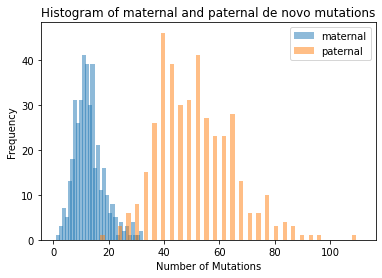

In [28]:
fig, ax = plt.subplots()
ax.hist(merge.loc[:, "mat_dnm"], label = "maternal", bins =30, alpha = 0.5, width = 1.5)
ax.hist(merge.loc[:, "pat_dnm"], label = "paternal", bins =30, alpha = 0.5, width = 1.5)
ax.set_title("Histogram of maternal and paternal de novo mutations")
ax.set_xlabel("Number of Mutations")
ax.set_ylabel("Frequency")
ax.legend()
plt.show()

# 9. Test whether the number of maternally inherited de novo mutations per proband is significantly different than the number of paternally inherited de novo mutations per proband.

In [22]:
stats.ttest_ind(merge.loc[:, "mat_dnm"],merge.loc[:, "pat_dnm"])

Ttest_indResult(statistic=-53.403565287269245, pvalue=2.1986031793078793e-264)

# 10. Use Poisson to test for an association between maternal age and maternal de novo mutations 


In [23]:
Poisson_mat = smf.poisson(formula = "mat_dnm ~ 1 + Mother_age", data = merge)
results_matp = Poisson_mat.fit()
results_matp.summary()

Optimization terminated successfully.
         Current function value: 2.927974
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                          Poisson Regression Results                          
==============================================================================
Dep. Variable:                mat_dnm   No. Observations:                  396
Model:                        Poisson   Df Residuals:                      394
Method:                           MLE   Df Model:                            1
Date:                Mon, 13 Sep 2021   Pseudo R-squ.:                 0.07164
Time:                        14:15:58   Log-Likelihood:                -1159.5
converged:                       True   LL-Null:                       -1248.9
Covariance Type:            nonrobust   LLR p-value:                 8.241e-41
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.7671      0.060     29.235      0.000       1.649       1.886
Mother_age     0.0281      0.002     13.582      0.000       0.024       0.032
==============================================================================
"""

# 10. Use Poisson to test for an association between paternal age and paternal de novo mutations 


In [24]:
Poisson_pat = smf.poisson(formula = "pat_dnm ~ 1 + Father_age", data = merge)
results_patp = Poisson_pat.fit()
results_patp.summary()

Optimization terminated successfully.
         Current function value: 3.578620
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                          Poisson Regression Results                          
==============================================================================
Dep. Variable:                pat_dnm   No. Observations:                  396
Model:                        Poisson   Df Residuals:                      394
Method:                           MLE   Df Model:                            1
Date:                Mon, 13 Sep 2021   Pseudo R-squ.:                  0.2277
Time:                        14:15:58   Log-Likelihood:                -1417.1
converged:                       True   LL-Null:                       -1834.9
Covariance Type:            nonrobust   LLR p-value:                1.004e-183
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.1903      0.027    116.856      0.000       3.137       3.244
Father_age     0.0241      0.001     29.608      0.000       0.023       0.026
==============================================================================
"""

# Paternal prediciton : Father 50.5 yo

In [25]:
new_observation=pd.DataFrame({"Father_age" : [50.5]})
results_patp.predict(new_observation)

0    82.031316
dtype: float64